# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file =  '/home/jesse/Downloads/traffic_signs_data/train.p' # NB read only default
validation_file= '/home/jesse/Downloads/traffic_signs_data/valid.p'
testing_file =   '/home/jesse/Downloads/traffic_signs_data/test.p'

with open(training_file, mode='rb') as f: # mode Read Binary
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### 1.1 Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np
import pandas as pd

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:4] # index multiple dims - from 1 incl to 4 excl

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### 1.2 Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

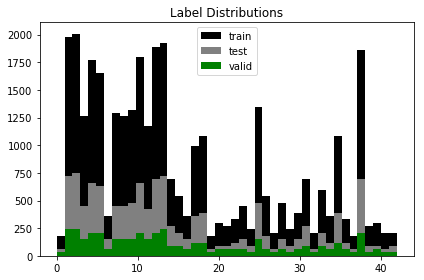

(15.738297077502228, 12.002396466891161)

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


# Plot Histograms of 3 data sets (labels - distribution looks the same)
plt.hist(y_train, bins=43, color='black', label="train")
plt.hist(y_test, bins=43, color='gray', label="test")
plt.hist(y_valid, bins=43, color='g', label="valid")
plt.title("Label Distributions")
plt.legend()
plt.tight_layout()
plt.show()

# verify with eg % distribution - needs operation
#train_valid = y_train/y_valid
#train_test = y_train/y_test
#test_valid = y_test/y_valid

#
np.mean(y_train), np.std(y_train)

#### Observations

There appears to be valid-train-test homogeneity (ebi confirm numerically).

However some signs are much more common than others. Speed limit signs are generally (but not uniformly) over-represented. Lots of important signs are under-represented (danger children etc).

This heterogeneity is most extreme in the training set and smoothed out for validation. The test set appears somewhere in the middle. This will impact learning later on unless artificial data are generated (eg with augmentation).

#### Examine labels

In [4]:
# Decode
signnames = np.loadtxt('signnames.csv', dtype=str, delimiter=',')
#print(type(signnames))
print(signnames[0,])
print(signnames[1,]) # y_train=0 means "20km/h"; this happens when signnames index is 1
print(signnames[42,])
print(signnames[43,])

['ClassId' 'SignName']
['0' 'Speed limit (20km/h)']
['41' 'End of no passing']
['42' 'End of no passing by vehicles over 3.5 metric tons']


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### 2.1 Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### 2.1.1 Helper functions

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import cv2
seed = 32

# The following is not used since it worsened performance; probably because it uses MATLAB-style weights designed to 
# replicate human perception (green is hugely overweight)
# Convert to grayscale
def gray(img):
    img_ = img.astype(np.uint8)
    gray = cv2.cvtColor(img_, cv2.COLOR_RGB2GRAY)
    gray_ = gray.astype(np.uint8)
    return gray_

# Credit Medium piece on this project
# Convert grayscale to histogram equalise using cv2

def equalize(img):
    img_=img.astype(np.uint8)
    equal = cv2.equalizeHist(img_)
    return equal

def norm_basic(img): # why doesn't this do what I want? outputs b/w image
    out = ((img-128)/128).astype(np.uint8)
    return (out)

def merge(img_1, alpha, img_2, beta, gamma=0):
    out = cv2.addWeighted(img_1, alpha, img_2, beta, gamma)
    return out

def add_Gauss_noise(img, color=True, rate=0.1):
    '''
    Adds rate*noise to (1-rate)*img; returns a blend. Enter color=False for grayscale image.
    '''
    np.random.seed(seed=seed)
    ones = np.ones_like(img)
    if color:
        noise = (np.random.randn(ones.shape[0], ones.shape[1], ones.shape[2])*128+128).astype(np.uint8)
    else:
        noise = (np.random.randn(ones.shape[0])*128+128).astype(np.uint8)
    merged = merge(img_1=img, alpha=1-rate, img_2=noise, beta=rate, gamma=0)
    return merged

def center(img):
    return (img-np.mean(img)).astype(np.uint8)

In [6]:
# Define transformation functions
# Credit: github.vxy10/ImageAugmentation

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    random_bright = 0.25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2]=image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1, cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img, ang_range, shear_range, trans_range, brightness=0):
    '''
    This function transforms images to generate new images: rotation, shear, translation and brighten.
    A random uniform distribution is used to generate different parameters for transformation.
    Set "brightness=1" to augment brightness; ranges take floats.
    '''
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows, cols, ch = img.shape
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2), ang_rot, 1)
    
    # Translation
    tr_x = trans_range * np.random.uniform()-trans_range/2
    tr_y = trans_range * np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    
    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]]) # are these numbers 32x32-friendly?
    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    
    # Brightness
    # Seperate function
    
    
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    
    Shear_M = cv2.getAffineTransform(pts1, pts2)
    
    img = cv2.warpAffine(img, Rot_M, (cols,rows))
    img = cv2.warpAffine(img, Trans_M, (cols, rows))
    img = cv2.warpAffine(img, Shear_M, (cols,rows))
    
    if brightness == 1:
        img = augment_brightness_camera_images(img)
    
    return img

### Generate Data

In [13]:
# Do the counts (Which data do we need to supplement (artifically)?)

d_train = np.zeros((43))
for i in range(43):
    fre = sum(y_train==i)
    d_train[i]=fre
    
d_valid = np.zeros((43))
for i in range(43):
    fre = sum(y_valid==i)
    d_valid[i]=fre

d_test = np.zeros((43))
for i in range(43):
    fre = sum(y_test==i)
    d_test[i]=fre

In [14]:
# Which columns are outliers?
print(np.mean(d_train),np.std(d_train))
print(np.median(d_train)) 
# With std=mean (approx), no data are outliers... . Max=10*min for all three datasets.
# NB don't mess with the valid or test sets!
print(np.argmax(d_train))
print(np.max(d_train), np.min(d_train), np.max(d_valid), np.min(d_valid), np.max(d_test), np.min(d_test))

# Let's generate otoo 1000 data for about 3/4 of the labels.

print(d_train<1000)
print((d_train<2000)*(2000-d_train)) # how many new data to create in each index
print(np.sum((d_train<2000)*(2000-d_train)))

#for value, index in 

809.279069767 619.420183705
540.0
2
2010.0 180.0 240.0 30.0 750.0 60.0
[ True False False False False False  True False False False False False
 False False  True  True  True  True False  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True]
[ 1820.    20.    -0.   740.   230.   350.  1640.   710.   740.   680.
   200.   830.   110.    80.  1310.  1460.  1640.  1010.   920.  1820.
  1700.  1730.  1670.  1550.  1760.   650.  1460.  1790.  1520.  1760.
  1610.  1310.  1790.  1401.  1640.   920.  1670.  1820.   140.  1730.
  1700.  1790.  1790.]
51211.0


In [15]:
# Perform Generation
decision_boolean = d_train<2000
num_to_gen       = (d_train<2000)*(2000-d_train)

generated_image_list = []
gen_labels_list = []

for label in range(43):
    testCounter=0 # delete when finished
    if decision_boolean[label] == True:
        num_to_gen_temp = int(num_to_gen[label])
        num_originals_to_trans = int(num_to_gen_temp / 100)
        print('label= ',label, 'originals to transf : ', num_originals_to_trans)
        
        # select however many images to transform
        i = 0 # for each of the 18 i-values, transform 100 images
        while i < num_originals_to_trans: # 18 for first label; i=0,1,2,...,17
            # then for each one, generate 100 new images
            for index, label_temp in enumerate(y_train): # (0,43),(1,12),(2,0),...,(25k,27)
                if i < num_originals_to_trans and label_temp == label: # whenever y_train has value '0' eg (2,0)
                    img_temp = X_train[index] # select X_train[2] (an image corresponding to label=0)
                    # generate & store*2 100 images from gen_new(img_temp)
                    j = 0
                    while j < 100: # change back to 100 after testing
                        img = transform_image(img_temp, 10,5,2,brightness=0) # 20,10,5,1
                        generated_image_list.append(img) # append images
                        gen_labels_list.append(label) # and labels
                        j += 1 # until 100 have been created
                    testCounter+=1
                    i += 1 # goes up each time new image is chosen (and multiplied)
    print(testCounter) # delete when finished

label=  0 originals to transf :  18
18
label=  1 originals to transf :  0
0
0
label=  3 originals to transf :  7
7
label=  4 originals to transf :  2
2
label=  5 originals to transf :  3
3
label=  6 originals to transf :  16
16
label=  7 originals to transf :  7
7
label=  8 originals to transf :  7
7
label=  9 originals to transf :  6
6
label=  10 originals to transf :  2
2
label=  11 originals to transf :  8
8
label=  12 originals to transf :  1
1
label=  13 originals to transf :  0
0
label=  14 originals to transf :  13
13
label=  15 originals to transf :  14
14
label=  16 originals to transf :  16
16
label=  17 originals to transf :  10
10
label=  18 originals to transf :  9
9
label=  19 originals to transf :  18
18
label=  20 originals to transf :  17
17
label=  21 originals to transf :  17
17
label=  22 originals to transf :  16
16
label=  23 originals to transf :  15
15
label=  24 originals to transf :  17
17
label=  25 originals to transf :  6
6
label=  26 originals to transf : 

new:  16
CSV:  ['16' 'Vehicles over 3.5 metric tons prohibited']


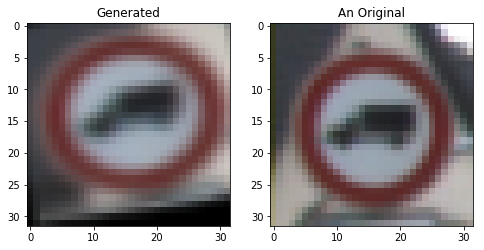

In [16]:
# Reality check - make sure images have correct label (see csv!), are different etc
i=10678
print('new: ', gen_labels_list[i]) # y=36, corresponding to signnames[37,] = "go straight or right"
print('CSV: ', signnames[gen_labels_list[i]+1,])

# Get an original
check_i = -1
target = signnames[gen_labels_list[i]+1,][0]
#print(target)
for index, value in enumerate(y_train):
    #print (index,str(value),target,value==target,type(value),type(target))
    if str(value) == target:
        check_i = index
        break

# Plot
fig = plt.figure(figsize=(8,16))

a = fig.add_subplot(121)
a.set_title("Generated")
plt.imshow(generated_image_list[i])

a = fig.add_subplot(122)
a.set_title("An Original")
plt.imshow(X_train[check_i])

plt.show()

### Merge Gen Data with Original

In [17]:
# Convert
generated_image_array = np.asarray(generated_image_list)
gen_labels_array      = np.asarray(gen_labels_list)

print("Gen: ", generated_image_array.shape, gen_labels_array.shape)
print("Original: ", X_train.shape, y_train.shape)
print("Merging...")
merged_images = np.concatenate((X_train, generated_image_array),axis=0)
merged_labels = np.concatenate((y_train, gen_labels_array),axis=0)

print("Merged: ", merged_images.shape, merged_labels.shape)

Gen:  (49600, 32, 32, 3) (49600,)
Original:  (34799, 32, 32, 3) (34799,)
Merging...
Merged:  (84399, 32, 32, 3) (84399,)


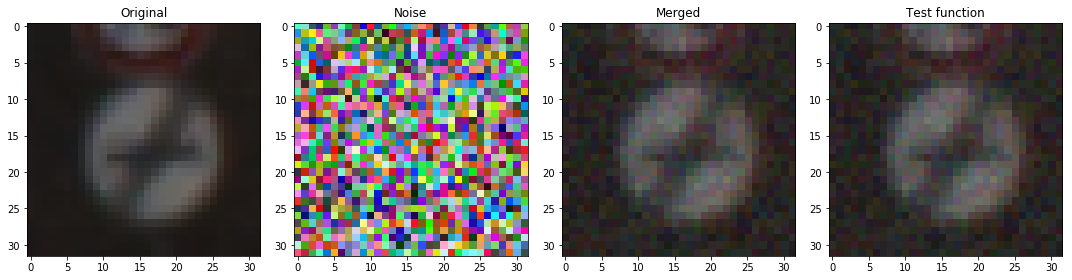

True


In [12]:
# Visualization of Noise-Adding Process

img = X_train[0]; color=True; rate=0.1
np.random.seed(seed=seed)
ones = np.ones_like(img)
if color:
    noise = (np.random.randn(ones.shape[0], ones.shape[1], ones.shape[2])*128+128).astype(np.uint8)
else:
    noise = (np.random.randn(ones.shape[0])*128+128).astype(np.uint8)
merged = merge(img_1=img, alpha=1-rate, img_2=noise, beta=rate, gamma=0)

fig = plt.figure(figsize=(15,15))

pic_1 = img
a = fig.add_subplot(141)
a.set_title('Original')
plt.imshow(pic_1)

pic_2 = noise
a = fig.add_subplot(142)
a.set_title('Noise')
plt.imshow(pic_2)

pic_3 = merged
a = fig.add_subplot(143)
a.set_title('Merged')
plt.imshow(pic_3)

pic_4 = add_Gauss_noise(img)
a= fig.add_subplot(144)
a.set_title('Test function')
plt.imshow(pic_4)

plt.tight_layout()
plt.show()

print(np.min(pic_4==pic_3))

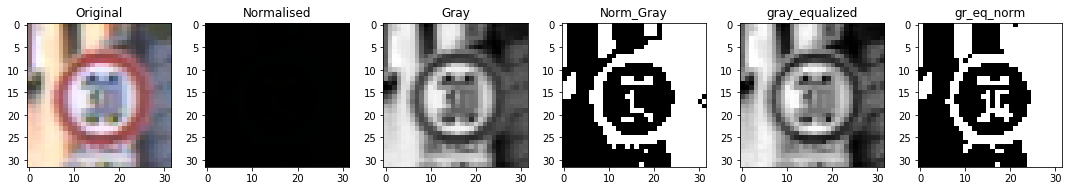

In [13]:
# Visualization of Graying Process - Experiments

def viz_gray(index=0):
    fig = plt.figure(figsize=(15,10))

    img_1 = X_test[index]
    a = fig.add_subplot(161)
    a.set_title('Original')
    plt.imshow(img_1)

    img_2 = norm_basic(img_1)
    a = fig.add_subplot(162)
    a.set_title('Normalised')
    plt.imshow(img_2)

    img_3 = gray(img_1).astype(np.uint8)
    a = fig.add_subplot(163)
    a.set_title('Gray')
    plt.imshow(img_3,cmap='gray')

    img_4 = gray(img_2).astype(np.uint8)
    a = fig.add_subplot(164)
    a.set_title('Norm_Gray')
    plt.imshow(img_4,cmap='gray')
    
    img_5 = equalize(img_3)
    a = fig.add_subplot(165)
    a.set_title('gray_equalized')
    plt.imshow(img_5, cmap='gray')
    
    test = norm_basic(img_5)
    test = test.astype(np.uint8)
    a = fig.add_subplot(166)
    a.set_title('gr_eq_norm')
    plt.imshow(test, cmap='gray')
    
    plt.tight_layout()
    plt.show()
viz_gray(100)

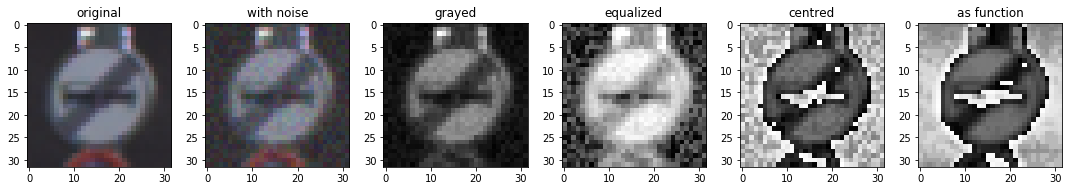

255


In [14]:
# Def of crucial function and visualization of Pre-Processing Chain
# noise, gray, equalize, center

# Define pre-processing function
def pre_process(image,noise_=True,gray_=True,equalize_=True,center_=True):
    if noise_:
        image = add_Gauss_noise(image)
    if gray_:
        image = gray(image) # 98,80,80
    if equalize_:
        image = equalize(image) # 98,80,80
    #image = (image-128)/128 # 98,82,85; NB norm_basic(image) - fails, still not sure why but converts to b/w
    if center:
        image = center(image) #NB should equalize happen second?
    
    return image

def viz_chain(img,noise_=True,gray_=True,equalize_=True,center_=True):
    fig = plt.figure(figsize=(15,10))
    a = fig.add_subplot(161)
    a.set_title('original')
    plt.imshow(img)
    
    # Noise
    pic_1 = add_Gauss_noise(img)
    a = fig.add_subplot(162)
    a.set_title('with noise')
    plt.imshow(pic_1)
    
    pic_2 = gray(pic_1)
    a = fig.add_subplot(163)
    a.set_title('grayed')
    plt.imshow(pic_2,cmap='gray')
    
    pic_3 = equalize(pic_2)
    a = fig.add_subplot(164)
    a.set_title('equalized')
    plt.imshow(pic_3,cmap='gray')
    
    pic_4 = center(pic_3)
    a = fig.add_subplot(165)
    a.set_title('centred')
    plt.imshow(pic_4,cmap='gray')
    
    pic_5 = pre_process(img,noise_=noise_,gray_=gray_,equalize_=equalize_,center_=center_) # test
    a = fig.add_subplot(166)
    a.set_title('as function')
    plt.imshow(pic_5,cmap='gray')
    
    plt.tight_layout()
    plt.show()
    
    print(np.max(pic_4-pic_5)) # double-check!
imagen = X_train[110]
viz_chain(imagen,noise_=False)

### 2.1.2 Perform Preprocessing

In [11]:
# !!!
# First get originals (REFRESH, undo any previous pre-processing)
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [16]:
# !!! CHOOSE WHETHER OR NOT TO APPLY PREPROCESS !!!
# Convert dataset - takes a few seconds
# If merging, skip this and see below

apply_pre_process = False
if apply_pre_process:
    # Create transformed images (array of same shape as original but images lose a rank)
    # First create a list, then convert to array. Print shapes for reality check.
    X_train_new_list = []
    for image in X_train: #for image in X_train:
        new = pre_process(image,noise_=False,gray_=True,equalize_=False, center_=False)
        X_train_new_list.append(new)    
    X_train_new_array = np.asarray(X_train_new_list)
    print("test shapes: ", X_train_new_array.shape, X_train.shape)

    X_valid_new_list = []
    for image in X_valid:
        new = pre_process(image,noise_=False,gray_=True,equalize_=False, center_=False)
        X_valid_new_list.append(new)
    X_valid_new_array = np.asarray(X_valid_new_list)
    print("valid shapes: ", X_valid_new_array.shape, X_valid.shape)

    X_test_new_list = []
    for image in X_test:
        new = pre_process(image,noise_=False,gray_=True,equalize_=False, center_=False)
        X_test_new_list.append(new)
    X_test_new_array = np.asarray(X_test_new_list)
    print("test shapes: ", X_test_new_array.shape, X_test.shape)
    print("Note whether gray has been applied or not for below")

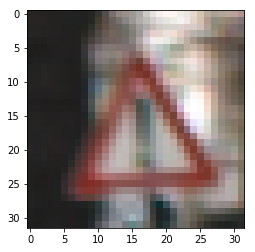

In [17]:
# Visualise transformed signs (colorscale=hot, why not?) 1100
#plt.imshow(X_train_new_array[21000], cmap='gray')
plt.imshow(X_train[21000])

### 2.1.3 More advanced pre-processing

                                        Credit: Kessy, Lewin, Strimmer 2015 (2016)
                                        Optimal Whitening and Decorrelation
                                        Imperial \& Brunel

The idea is to transform a d-dimensional vector $x$ of mean $\mu$ and covariance matrix $\Sigma = X^T X$ to another d-dimensional vector $z=Wx$. The choice of $W$, the "whitening" matrix, depends on the desired transformation. z has the property $var(z)=I$, and if x has been zeroed then $E(z)=0$.

The simplest standardization is $Z=Wx$ where $W = V^{-\frac{1}{2}}$ and $V=diag(\sigma_{1}^2,...,\sigma_d^2)$ is the diagonal matrix of variances.

Note the identities of decomposition:

$\Sigma=V^\frac{1}{2} P V^\frac{1}{2}$ where $P$ is the correlation matrix and $V$ the diagonal covariance matrix;

and eigen-decomposition:

$\Sigma = U \Lambda U^T  $ where $U$ is an eigenvector matrix and $\Lambda$ an eigenvalue (of $\Sigma$) matrix;

$P = G\Theta G^T$ where $G$ contains eigenvectors and $\Theta$ eigenvalues (of $P$).


The conclusions of the paper are as follows:

1. ZCA whitening
$W = \Sigma\ ^ {-\frac{1}{2}}$;
2. ZCA-cor whitening (maximally similar to original)
$W = P ^ {-\frac{1}{2}} V ^ {-\frac{1}{2}}$;
3.  PCA-cor (maximally compressed original)
$W = \Theta ^ {-\frac{1}{2}} G^T V ^ {-\frac{1}{2}} $.

### Data Augmentation

Some techniques for transformations (affine and other):
1. Translation
2. Small rotations
3. Colour transformations
6. Expanding
4. Add random noise
5. Blurring

Motivation:
1. Balancing training set (generate more data for the under-represented labels (see above) or trim over-)
2. Increase variance of training data to increase robustness of learned model

### Augment Data (Increase Data Size): Jittered Data (=merged then augmented)
1. Try only with affine operations
2. Try with random noise
3. Think about brightness and equalizing

In [18]:
# Now we have a balanced set, with under-represented data points filled in by data generated using transform_image

# Generate Data

# Save new images and corresponding labels here
# later convert to arrays then concatenate with merged data and labels
extra_images_list = []
extra_labels_list = []

# Loop through images and corresponding labels, adding new image and label to new lists
for index, image in enumerate (merged_images): #NB: merged_labels[i] is label for merged_images[i]
    new_img = transform_image(image, ang_range=10, shear_range=5, trans_range=2, brightness=0)
    extra_images_list.append(new_img)
    extra_labels_list.append(merged_labels[index])

84399
84399
new:  16
CSV:  ['16' 'Vehicles over 3.5 metric tons prohibited']


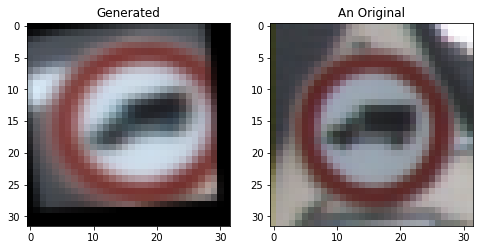

In [19]:
# Reality Check
print(len(extra_images_list))
print(len(extra_labels_list))

# Make sure images have correct label (see csv!), are different etc
i=45600
print('new: ', extra_labels_list[i]) #Eg y=36, corresponding to signnames[37,] = "go straight or right"
print('CSV: ', signnames[extra_labels_list[i]+1,])

# Get an original
check_i = -1
target = signnames[extra_labels_list[i]+1,][0]
#print(target)
for index, value in enumerate(y_train):
    if str(value) == target:
        check_i = index # use this for ref in X_train
        break

# Plot
fig = plt.figure(figsize=(8,16))

a = fig.add_subplot(121)
a.set_title("Generated")
plt.imshow(extra_images_list[i])

a = fig.add_subplot(122)
a.set_title("An Original")
plt.imshow(X_train[check_i])

plt.show()

In [20]:
# Make new arrays, append to "merged" for input into keras
extra_images_array = np.asarray(extra_images_list)
extra_labels_array = np.asarray(extra_labels_list)

# Merge
jittered_images = np.concatenate((merged_images,extra_images_array),axis=0)
jittered_labels = np.concatenate((merged_labels,extra_labels_array),axis=0)

In [21]:
# Reality Check
print(X_train.shape, generated_image_array.shape, merged_images.shape, jittered_images.shape)
print(y_train.shape, gen_labels_array.shape, merged_labels.shape, jittered_labels.shape)

(34799, 32, 32, 3) (49600, 32, 32, 3) (84399, 32, 32, 3) (168798, 32, 32, 3)
(34799,) (49600,) (84399,) (168798,)


### Model Architecture

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.optimizers import SGD, Adam
from keras.utils import np_utils

Using TensorFlow backend.


In [9]:
# Hyperparameters
learning_rate = 0.001 #0.001
n_epochs = 60
batch_size = 128

# Network params
n_classes = 43
dropout = 0.7

#### LeNet 1998 (later try resnet etc? inception)
in -> conv -> relu -> pool -> conv -> relu -> pool -> fc -> relu -> fc -> softmax -> out
<p>
in -> conv_1 -> pool_1 -> conv_2 -> pool_2 -> fc_1 -> fc_2 -> out

In [22]:
# Credit: pyimagesearch.com - Adrian Rosebrock 2016 for architecture and code (edited for notebook)

# lenet.py

def build(width, height, depth, classes,
          weights_path=None):
    
    model = Sequential()
    
    #First conv-relu-pool chain
    model.add(Convolution2D(filters=16,kernel_size=(5,5),padding='same', input_shape=(height,width,depth),
                           data_format="channels_last")) # 20 filters
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2))) # n = (n+2p-f)/s+1 = (32-2)/2+1 = 16 (2,2 always halves)
 
    #Second con-relu-pool chain
    model.add(Convolution2D(filters=32,kernel_size=(5,5),padding='same',
                           data_format="channels_first")) # NB new input_shape, unspecified' 50 filters
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2))) # n = (16-2)/2+1 = 8
    
    ##Third con-relu-pool chain 31/12/17 00:40
    #model.add(Convolution2D(filters=256,kernel_size=(5,5),padding='same',
    #                       data_format="channels_first")) # NB new input_shape, unspecified' 50 filters
    #model.add(Activation('relu'))
    #model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2))) # n = (16-2)/2+1 = 8
    
    #Fully-connected layers
    model.add(Flatten())
    
    # Dropout
    model.add(Dropout(rate=dropout))
    
    # FC
    model.add(Dense(units=1256))
    model.add(Activation('relu'))
    
    # FC - experimental
    model.add(Dense(units=64))
    model.add(Activation('relu'))
    
    #Softmax classifier
    model.add(Dense(classes)) # penultimate layer, having 43 nodes
    model.add(Activation('softmax'))
    
    #Use any pre-loaded weights - activated if said argument supplied when build() is called
    if weights_path is not None:
        model.load_weights(weights_path)
        
    return model

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [29]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

### Skip if using jittered data ### Input Datasets

In [153]:
# Skip if using jittered data
using_jittered_data=True
if using_jittered_data==False:
    # Define data including one-hot encoded labels
    trainData = merged_images #-128 #/255 #merged_images #np.asarray(generated_image_list)# X_train
    validData = X_valid #-128 #/255 #X_valid
    testData = X_test #-128 #/255 #X_test
    trainLabels = np_utils.to_categorical(merged_labels, 43) #(merged_labels,43) #(gen_labels_list), 43) #(y_train, 43)
    validLabels = np_utils.to_categorical(y_valid, 43)
    testLabels = np_utils.to_categorical(y_test, 43)

### Manual Dataset Selection & Processing (Merged then process)
NB Graying jittered data takes ages and causes my machine to slow down significantly even after execution.

In [23]:
import timeit

In [24]:
# Convert to gray manually

# Define data including one-hot encoded labels
t0 = timeit.default_timer()
trainData = np.sum(jittered_images/3,axis=3,keepdims=True) #np.sum(merged_images/3,axis=3,keepdims=True) #-128 #/255 #merged_images #np.asarray(generated_image_list)# X_train
t1 = timeit.default_timer() #720 seconds = 12 minutes (913 on a slow day)

In [25]:
validData = np.sum(X_valid/3,axis=3,keepdims=True)  #-128 #/255 #X_valid
t2 = timeit.default_timer()
testData = np.sum(X_test/3,axis=3,keepdims=True)   #-128 #/255 #X_test
t3 = timeit.default_timer()
print(t1-t0,t2-t1,t3-t2)
#trainLabels = np_utils.to_categorical(jittered_labels, 43) #(merged_labels,43) #(gen_labels_list), 43) #(y_train, 43)
#validLabels = np_utils.to_categorical(y_valid, 43)
#testLabels = np_utils.to_categorical(y_test, 43)

994.2585968789999 406.93164623400116 1.233939041998383


In [89]:
# IGNORE
ignore=True
if ignore==False:
    # regen, gray
    testData = np.sum(X_test/3,axis=3,keepdims=True)   #-128 #/255 #X_test
    # equalize
    new_test_list = []
    for img in testData:
        eq = cv2.equalizeHist(img.astype(np.uint8))
        img = eq[:,:,np.newaxis]
        new_test_list.append(img)

    testData = np.asarray(new_test_list)

    # noramlize
    mu3=np.mean(testData)
    print(mu3)#82 # 82.1
    testData = (testData-mu3)/mu3

131.626905882


In [27]:
trainLabels = np_utils.to_categorical(jittered_labels, 43) #(merged_labels,43) #(gen_labels_list), 43) #(y_train, 43)
validLabels = np_utils.to_categorical(y_valid, 43)
testLabels = np_utils.to_categorical(y_test, 43)

print(testData.shape, testLabels.shape, X_test.shape, y_test.shape)

(12630, 32, 32, 1) (12630, 43) (12630, 32, 32, 3) (12630,)


In [28]:
# HISTOGRAM EQUALIZE

# original -> gray -> equalize -> reshape

# train then valid and test below

print('input dimension: ', trainData[0].shape)
print('input pixel ', trainData[0][15,21])
new_train_list = []
for img in trainData:
    eq = cv2.equalizeHist(img.astype(np.uint8)) # does re-typing to integer lose too much info? no, still 0-255 scale!
    img = eq[:,:,np.newaxis]
    new_train_list.append(img)
trainData = np.asarray(new_train_list)

#trainData = cv2.equalizeHist(trainData)
# do sth
print('output dimension: ', trainData[0].shape)
print('out pixel ', trainData[0][15,10])

input dimension:  (32, 32, 1)
input pixel  [ 80.]
output dimension:  (32, 32, 1)
out pixel  [243]


In [29]:
new_valid_list = []
new_test_list = []

for img in validData:
    eq = cv2.equalizeHist(img.astype(np.uint8))
    img = eq[:,:,np.newaxis]
    new_valid_list.append(img)
    
validData = np.asarray(new_valid_list)

for img in testData:
    eq = cv2.equalizeHist(img.astype(np.uint8))
    img = eq[:,:,np.newaxis]
    new_test_list.append(img)
    
testData = np.asarray(new_test_list)

In [30]:
# CENTER & NARROW (NORMALIZE)
mu1=np.mean(trainData)
mu2=np.mean(validData)
mu3=np.mean(testData)
print(mu1) #68 # 71.5 # 121 after gray then equal
print(mu2)#84 # 83.6 # 131
print(mu3)#82 # 82.1 # 131

trainData = (trainData-mu1)/mu1
validData = (validData-mu2)/mu2
testData = (testData-mu3)/mu3

# NB data now ready for model

121.214412385
131.468053784
131.626905882


In [51]:
# Test Equalize ######

# Conclusion: do this after grayscale-conversion but before any other compression
# original -> gray -> equalize -> reshape

# Original
#plt.imshow(X_train[0])
print('original shape:', X_train[0].shape)
print('original pixel: ',X_train[0][15,20])

# trainData (grayed, centred and compressed)
temp_img = trainData[0]
print('grayscaled original shape: ', temp_img.shape)
#plt.imshow(temp_img.astype(np.uint8))
print("gray pixel: ",temp_img[15,20])

test_equalize = cv2.equalizeHist((temp_img).astype(np.uint8))
print('equalized grayed shape: ',test_equalize.shape)
#plt.imshow(test_equalize)
print("equ gray pixel (rank-1):",test_equalize[15,20])
print(np.max(test_equalize[15,20]))

# equalize original image?
X_train[0].astype(np.uint8)
#plt.imshow(cv2.equalizeHist())


# reshape equalized-gray from 32x32 to 32x32x1
reshaped = test_equalize[:,:,np.newaxis]
print('reshaped shape: ',reshaped.shape)
#plt.imshow(reshaped)
print('reshaped pixel: ',reshaped[15,20])

original shape: (32, 32, 3)
original pixel:  [58 54 55]
grayscaled original shape:  (32, 32, 1)
gray pixel:  [ 55.66666667]
equalized grayed shape:  (32, 32)
equ gray pixel (rank-1): 191
191
reshaped shape:  (32, 32, 1)
reshaped pixel:  [191]


In [34]:
#plt.imshow(trainData[0],cmap='gray')
trainData[0].astype(np.uint8).shape
#plt.imshow(trainData[0].astype(np.uint8))

(32, 32, 1)

In [150]:
# IGNORE THIS CELL ALWAYS?
# IGNORE THIS CELL IF USING COLOR
# IF and only if grayscale has been applied, add back the missing dimension, and set depth=1 (else 3) below.
apply_gray = False
if apply_gray:
    #trainData = X_train.reshape((X_train.shape[0], 32, 32)) # error 3x
    #testData = X_test_norm.reshape((X_test.shape[0], 32, 32))
    #trainLabels = y_train.reshape((y_train.shape[0], 32, 32))
    #testLabels = y_test.reshape((y_test.shape[0], 32, 32))

    trainData = X_train_new_array
    validData = X_valid_new_array
    testData = X_test_new_array

    # re-insert channel axis for Keras
    trainData = trainData[:,:,:,np.newaxis]
    validData = validData[:,:,:,np.newaxis]
    testData  = testData[:,:,:,np.newaxis]
    print(trainData[0].shape)
else:
    plt.imshow(trainData[0])

(32, 32, 1)


### Start learning (get comfortable...)
Adjust "depth" if not grayscaling images.

In [31]:
# lenet_mnist.py - command-line rather than notebook...

depth = 1
load_model = True
save_weights = False
input_path="/home/jesse//Documents/Udacity/Drafts/Traffic_Sign/CarND-Traffic-Sign-Classifier-Project/Weights_5.csv"
output_path="/home/jesse//Documents/Udacity/Drafts/Traffic_Sign/CarND-Traffic-Sign-Classifier-Project/Weights_6.csv"

import argparse
ap = argparse.ArgumentParser()
ap.add_argument("-s", "--save-model", type=int, default=-1,
                help="(optional) whether or note model should be saved to disk")
ap.add_argument("-l", "--load-model", type=int, default=-1,
               help="(optional) whether or not pre-trained model should be loaded")
ap.add_argument("-w", "--weights", type=str,
               help="(optional) path to weights file")
args = vars(ap.parse_args([])) # need [] to avoid error; "parse" not notebook-compatible

# Initialize optimizer and model
print("[INFO] compiling model...")
opt = Adam(lr=learning_rate)
model = build(width=32, height=32, depth=depth, classes=n_classes,
             weights_path=input_path) # depth=3 works for color
model.compile(loss="categorical_crossentropy", optimizer=opt,
             metrics=["accuracy"])

# Only train and evaluate the model if not loading pre-trained model
if load_model == False:
    print("[INFO] training...")
    model.fit(trainData, trainLabels, batch_size=batch_size, epochs=n_epochs, verbose=1)
    # Show accuracy on valid & test sets
    print("[INFO] evaluating")
    (loss, accuracy) = model.evaluate(validData, validLabels, batch_size=batch_size, verbose=1)
    print("[INFO] valid accuracy: ", accuracy*100)
    (loss, accuracy) = model.evaluate(testData, testLabels, batch_size=batch_size, verbose=1)
    print("[INFO] test accuracy: ", accuracy*100)
    
# Optional save
if save_weights == True:
    print("[INFO] saving...")
    model.save_weights(output_path, overwrite=False)




# One-Hot Encode Labels
#y_train_K = np_utils.to_categorical(y_train_K, 43)
#y_test_K = np_utils.to_categorical(y_test_K, 43)

[INFO] compiling model...


In [32]:
# Show accuracy on valid & test sets
print("[INFO] evaluating")
(loss, accuracy) = model.evaluate(validData, validLabels, batch_size=batch_size, verbose=1)
print("[INFO] valid accuracy: ", accuracy*100)
(loss, accuracy) = model.evaluate(testData, testLabels, batch_size=batch_size, verbose=1)
print("[INFO] test accuracy: ", accuracy*100)

[INFO] evaluating
4410/4410 [==============================] - 6s     
[INFO] valid accuracy:  93.6507936508
12630/12630 [==============================] - 15s    
[INFO] test accuracy:  90.5067300259


### Performance Analysis

In [33]:
#Subset for performance analysis
# define functions, then draw graph of accuracy vs code

def evaluate_subset(chosen_label_code = 23,X=trainData,y=trainLabels):
    subset_X = []; subset_y=[]
    for index, hot_vector in enumerate(y): # trainLabels is one-hot encoded already
        if np.argmax(hot_vector) == chosen_label_code:
            subset_X.append(X[index])
            subset_y.append(y[index])

    #print(len(subset_X), len(subset_y))
    subset_X_array = np.array(subset_X); subset_y_array = np.array(subset_y)
    #print(subset_X_array.shape, subset_y_array.shape)
    (loss, accuracy_test) = model.evaluate(subset_X_array, subset_y_array, batch_size=batch_size, verbose=1)
    #print(accuracy_test)
    return chosen_label_code, accuracy_test

In [34]:
#evaluate_subset(chosen_label_code = 42,X=trainData,y=trainLabels)
#print(chosen_label_code, accuracy_test)

90/90 [==============================] - 0s


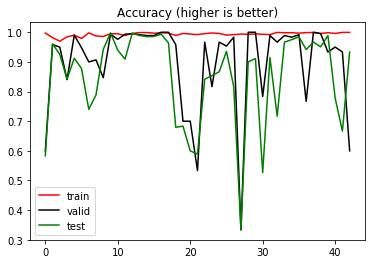

In [35]:
# Analyse performance (default = valid data) - takes a couple of minutes
performance_analysis_train = []
performance_analysis_valid = []
performance_analysis_test = []

for i in range(n_classes):
    loss, accuracy_test = evaluate_subset(i,trainData,trainLabels)
    performance_analysis_train.append((i,accuracy_test))
    loss, accuracy_test = evaluate_subset(i,validData,validLabels)
    performance_analysis_valid.append((i,accuracy_test))
    loss, accuracy_test = evaluate_subset(i,testData,testLabels) # cheating?
    performance_analysis_test.append((i,accuracy_test))
    
# Plot results
perf_anal_array_train = np.array(performance_analysis_train)
perf_anal_array_valid = np.array(performance_analysis_valid)
perf_anal_array_test = np.array(performance_analysis_test)

plt.plot(perf_anal_array_train[:,1],'r', label='train')
plt.plot(perf_anal_array_valid[:,1],'black', label='valid')
plt.plot(perf_anal_array_test[:,1],'green', label='test')
plt.title("Accuracy (higher is better)")
plt.legend()
plt.show()

In [36]:
print(np.mean(perf_anal_array_train[:,1])) #NB unweighted, but should be similar since I've balanced data
print(np.mean(perf_anal_array_valid[:,1]))
print(np.mean(perf_anal_array_test[:,1]))

0.993680960971
0.899077147061
0.852418958061


## Iterations Log

CNN20, CNN50, FC128-64-43. Merged data. Un-processed. No dropout.
    
1. 99.13,79,80 with new architecure (new FC layer, slightly changed nos), no pre-processing, jittered data
2. With all pre-processing: 80,40,37 - overfits for labels in 20s and 30s - this suggests making gen data more realistic and varied

CNN16, CNN32, D(0.7), FC128-64-43. Processed. Credit Medium.

1. With same gen data (half parameters), new archi and processed:
    0. Stuck at 2%!
2. Without dropout 29/12/17
    0. 69, 26, 25
    
CNN16, CNN32, FC128-64-43. Original data only, Un-pre-processed, no dropout.
1. 94, 79, 80 - not even learning to predict its own data. Having bigger Conv layers seemed to be better - let's confirm with all else equal.
2. 90s per epoch!

CNN20, CNN50, FC128-64-43. Original data only. Un-processed. No dropout.
1. 97, 80, 80
2. 150s per epoch

CNN20, CNN50, FC128-64-43. Original data only. Un-processed. No dropout. Adam instead of SGD. bacth 256
0. 98.62, 83.2, 83.7
1. Much faster. 80pc by epoch 2.
2. 137s an' all.
3. Interestingly, didn't do quite as well on training data but generalises better.
4. Weights saved as Weights.csv.

CNN16, CNN64, CNN256, FC256-128-43. Original data only. Un-processed. No dropout. Adam.
1. Stuck at 4.7%! Too big a machine (without skips or something).

CNN6, CNN16, FC128-64-43. batch 128
1. 98.25, 84.648, 84.972
2. Accuracy_breakdown_3.png

CNN6, CNN16, FC128-64-43. batch 128 - merged data
1. 98.95, 84.2, 83.0
2. 112s/epoch
3. Accuracy_breakdown_4.png

CNN6, CNN16, FC128-64-43. batch 128 - merged data + gray
0. 92, 49, 48
1. Much slower epoch 1 but good epoch 2
2. 80s
3. Why does uniform pre-processing worsen accuracy and generalizability?

CNN6, CNN16, FC128-64-43. batch 128 - merged data + manual-gray
1. 99.0, 85.6, 84.4

CNN6, CNN16, FC128-64-43. batch 128 - merged data + manual-gray + manual-normalize
1. 99.45, 85.7, 85.4

CNN6, CNN16, FC128-64-43. batch 128 - JITTERED data + manual-gray + manual-normalize
0. 87, 82, 83
1. 150s
2. Learning less but generalizing better? Accuracy_breakdown_8.png. Still not really learning some of the signs in the 20s. Perhaps the balancing examples weren't representative (but the addition of similarly-generated images resulting in improvements contradicts this). Maybe adding noise all round will help.
3. Data set has doubled (again) - this will have implications for the architecture.

CNN16, CNN32, FC128-64-43. batch 128 - JITTERED data + manual-gray + manual-normalize
1. 97.8, 89.7, 90.5

CNN16, CNN32, FC128-64-43. batch 128 - JITTERED data + manual-gray + equalize + manual-normalize (60 epochs)
1. 99, 93.65, 90 - good enough

Later: skip connection (don't use Sequential).

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [40]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")